# University of Stavanger
# MOD550 
# Applied Data Analytics and Statistics for Spatial and Temporal Modeling - Spring 2024
# Assignment 2 - SOLUTIONS

### Reidar B Bratvold and Enrico Riccardi

### Import libraries

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from IPython.display import display, Math

---
<span style='color:Blue'>
    
### Problem 1 - Scatterplots and Bivariate Distributions ("scatterplots_DATA.xlsx")
    
</span>

---

---
<span style='color:Blue'>
    
(a) Generate scatterplots of
    
i. Horizontal Permeability (kH) versus Porosity in Well 21-P
    
</span>

---

In [2]:
import os

# Get the current working directory
current_directory = os.getcwd()
print(current_directory)

new_directory = '/Users/reidarbbratvold/Documents/UiS/Undervisning/2024/MOD550/Assignments/A2/code'

# Change the current working directory to 'new_directory'
os.chdir(new_directory)
print(new_directory)

data_directory_path = os.path.join('..', 'data')
print(data_directory_path)

/Users/reidarbbratvold/Documents/UiS/Undervisning/2024/MOD550/Assignments/A2/code
/Users/reidarbbratvold/Documents/UiS/Undervisning/2024/MOD550/Assignments/A2/code
../data


In [3]:
file_name1 = '../data/scatterplots_DATA.csv'
df = pd.read_csv(file_name1) 
df.head()

,Porosity,kH,kV
0,30.3,442.5,366.2
1,39.8,729.6,476.7
2,37.5,436.1,92.6
3,14.7,44.2,39.0
4,23.7,35.3,25.2


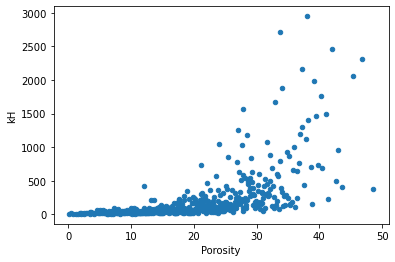

In [5]:
ax1 = df.plot.scatter(x='Porosity', y='kH')

---
<span style='color:Blue'>
    
ii. Log10 of kH versus Porosity in Well 21-P
    
</span>

---

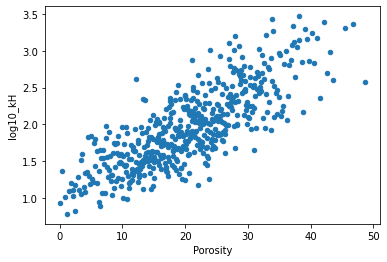

In [4]:
df['log10_kH'] = np.log10(df['kH'])
ax2 = df.plot.scatter(x='Porosity', y='log10_kH')

---
<span style='color:Blue'>
    
iii. Vertical Permeability (kV) versus Horizontal Permeability (kH) in Well 21-P
    
</span>

---

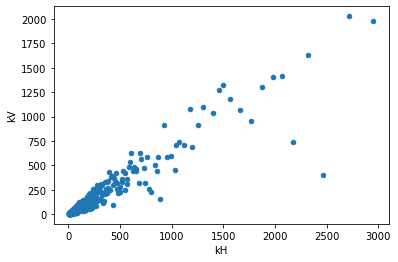

In [5]:
ax3 = df.plot.scatter(x='kH', y='kV')

---
<span style='color:Blue'>
    
(b) Generate a bivariet

i. histogram of Porosity (5% increments) and log10 kH (0.5 increments)
    
• Your poro_bin edges should be from 0 to 50% in 5% steps and
    
• Your perm_bin edges should be from 0 to 4 in 0.5 mD steps

Start by doing the binning
    
</span>

---

In [6]:
import math

x=df['Porosity']; y=df['log10_kH']

x_step = 5                            # increment for poro
y_step = 0.5                          # increment log10_kH

x_min = math.floor(np.min(x)) 
x_max = math.ceil(np.max(x)) 
x_max = x_step * round(x_max/x_step)  # round up to nearest 5 integer value, in this case 50

y_min = math.floor(np.min(y)) 
y_max = math.ceil(np.max(y))
y_max = y_step * round(y_max/y_step)  # round up to nearest 0.5 integer value, in this case 4

nx_bins = math.ceil((x_max - x_min) / x_step)    # number of poro bins
ny_bins = math.ceil((y_max - y_min) / y_step)    # number of log10_kH bins

x_bins = np.linspace(x_min, x_max, nx_bins+1) 
y_bins = np.linspace(y_min, y_max, ny_bins+1)

print('\nx_min, x_max =',x_min, x_max)
print('\ny_min, y_max =',y_min, y_max)
print('\nx_bins = ',x_bins)
print('\ny_bins = ',y_bins)
print('\nnx_bins and ny_bins = ',nx_bins, ny_bins)


x_min, x_max = 0 50

y_min, y_max = 0 4.0

x_bins =  [ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]

y_bins =  [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4. ]

nx_bins and ny_bins =  10 8


---
<span style='color:Blue'>
    
Create bivariate histogram using the count
    
</span>

---

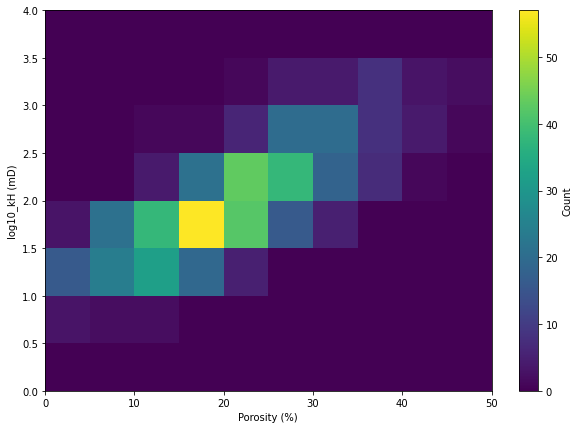

In [7]:
fig, ax = plt.subplots(figsize =(10, 7)) 

plt.hist2d(x, y, bins=[x_bins, y_bins]) 
cbar = plt.colorbar()
cbar.ax.set_ylabel('Count', rotation=90)
  
ax.set_xlabel('Porosity (%)')  
ax.set_ylabel('log10_kH (mD)')  
  
# show plot 
#plt.tight_layout()  
plt.show()

---
<span style='color:Blue'>

ii. cumulative frequency distribution of porosity and log10 kH
    
• The counts in each bin must be normalized so that the cumulative distribution goes from 0 (at poro = < 5% and log10_kH < 0.5) to 1 (at poro < 50% and log10_kH < 4)
    
• Matplotlib’s imshow function can be used for this.
    
Normalize all the counts by dividing them by the total number of data points.

This can be done by first extracting the counts in each bin by using matplotlib's hist2d function.
    
</span>

---

In [8]:
counts, xedges, yedges, im = ax.hist2d(x, y, bins =[x_bins, y_bins], density=False) 

n_data_points = sum(sum(counts))
norm_pmf = counts / n_data_points
cdf_counts = counts.cumsum(axis=0).cumsum(axis=1)
cdf_norm = norm_pmf.cumsum(axis=0).cumsum(axis=1)

print('\ncounts =\n', counts)
print('\nn_data_points =', n_data_points)
print('\nnorm_pmf =\n', norm_pmf)
print('\ncdf_counts =\n', cdf_counts)
print('\ncdf_norm =\n', cdf_norm)


counts =
 [[ 0.  3. 16.  3.  0.  0.  0.  0.]
 [ 0.  2. 24. 21.  0.  0.  0.  0.]
 [ 0.  2. 32. 38.  4.  1.  0.  0.]
 [ 0.  0. 19. 57. 21.  1.  0.  0.]
 [ 0.  0.  5. 42. 43.  6.  1.  0.]
 [ 0.  0.  0. 16. 38. 20.  4.  0.]
 [ 0.  0.  0.  5. 18. 20.  4.  0.]
 [ 0.  0.  0.  0.  7.  8.  8.  0.]
 [ 0.  0.  0.  0.  1.  4.  3.  0.]
 [ 0.  0.  0.  0.  0.  1.  2.  0.]]

n_data_points = 500.0

norm_pmf =
 [[0.    0.006 0.032 0.006 0.    0.    0.    0.   ]
 [0.    0.004 0.048 0.042 0.    0.    0.    0.   ]
 [0.    0.004 0.064 0.076 0.008 0.002 0.    0.   ]
 [0.    0.    0.038 0.114 0.042 0.002 0.    0.   ]
 [0.    0.    0.01  0.084 0.086 0.012 0.002 0.   ]
 [0.    0.    0.    0.032 0.076 0.04  0.008 0.   ]
 [0.    0.    0.    0.01  0.036 0.04  0.008 0.   ]
 [0.    0.    0.    0.    0.014 0.016 0.016 0.   ]
 [0.    0.    0.    0.    0.002 0.008 0.006 0.   ]
 [0.    0.    0.    0.    0.    0.002 0.004 0.   ]]

cdf_counts =
 [[  0.   3.  19.  22.  22.  22.  22.  22.]
 [  0.   5.  45.  69.  69.  69.  

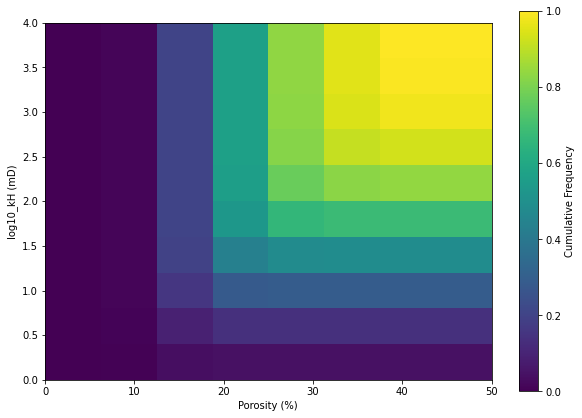

In [9]:
fig, ax = plt.subplots(figsize =(10, 7)) 

plt.imshow(cdf_norm, origin='lower', extent=[0, 50, 0, 4])
#plt.hist2d(x, y, bins=[x_bins, y_bins]) 
cbar = plt.colorbar()
cbar.ax.set_ylabel('Cumulative Frequency', rotation=90)
ax.set_aspect(10)
ax.set_xlabel('Porosity (%)')  
ax.set_ylabel('log10_kH (mD)')  
  
# show plot 
#plt.tight_layout()  
plt.show()

---
<span style='color:Blue'>
    
(c) Generate plots of the marginal frequency distributions for both porosity and log10 kH

Start by extracting the appropriate data from the 2D array - norm_pmf
    
</span>

---

In [10]:
x_poro = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50']
x = np.cumsum(norm_pmf, axis=1)
poro_marg = x[:,len(norm_pmf[0])-1]

x_log10_kH = ['0.0-0.5', '0.5-1.0', '1.0-1.5', '1.5-2.0', '2.0-2.5', '2.5-3.0', '3.0-3.5', '3.5-4.0']
y = np.cumsum(norm_pmf, axis=0)
log10_kH_marg = y[len(norm_pmf)-1]

---
<span style='color:Blue'>
    
Plot the histograms using Matplotlib's bar plot
    
</span>

---

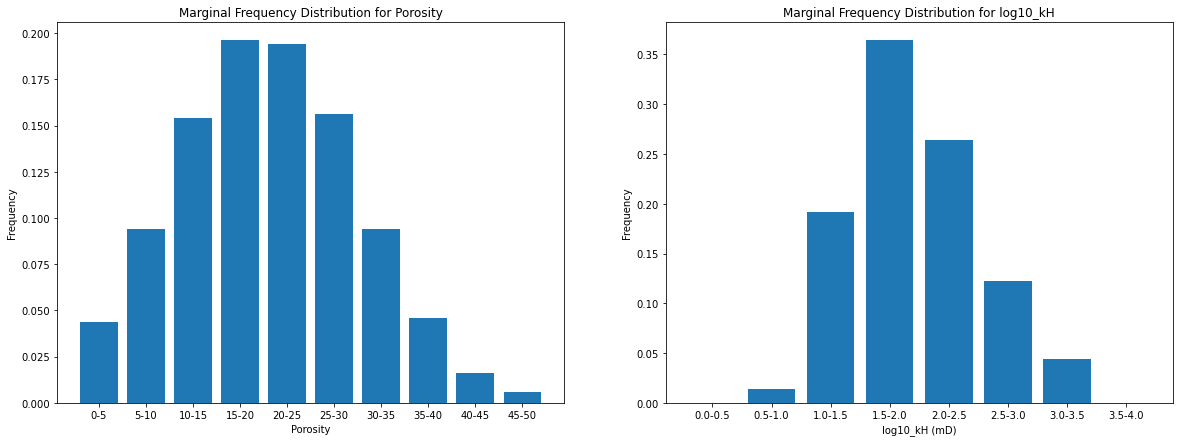

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (20, 7)) 
  
# creating the bar plot 
axes[0].bar(x_poro, poro_marg) 
axes[0].set_xlabel("Porosity")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Marginal Frequency Distribution for Porosity")
              
axes[1].bar(x_log10_kH, log10_kH_marg) 
axes[1].set_xlabel("log10_kH (mD)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Marginal Frequency Distribution for log10_kH")
  
plt.show() 

---
<span style='color:Blue'>
    
(d) Generate plots of the conditional frequency distributions
    
</span>

---

---
<span style='color:Blue'>
    
Recall from Bayes' rule that

$$
P(\phi | 2.0 < log10(kH) < 2.5) = \frac{P(\phi \; and \; 2.0 < log10(kH) < 2.5)}{P(2.0 < log10(kH) < 2.5)}
$$

and
    
$$
P(log10(kH) | 30 \% < \phi < 35 \%) = \frac{P(log10(kH) \; and \; 30 \% < \phi < 35 \%)}{P(30 \% < \phi < 35 \%)}
$$
    
</span>

---

---
<span style='color:Blue'>
    
Again, we need to extract the approbriate data from the 2D array "norm_pmf" and the use Bayes' Rule for the calculations.

---
    
</span>

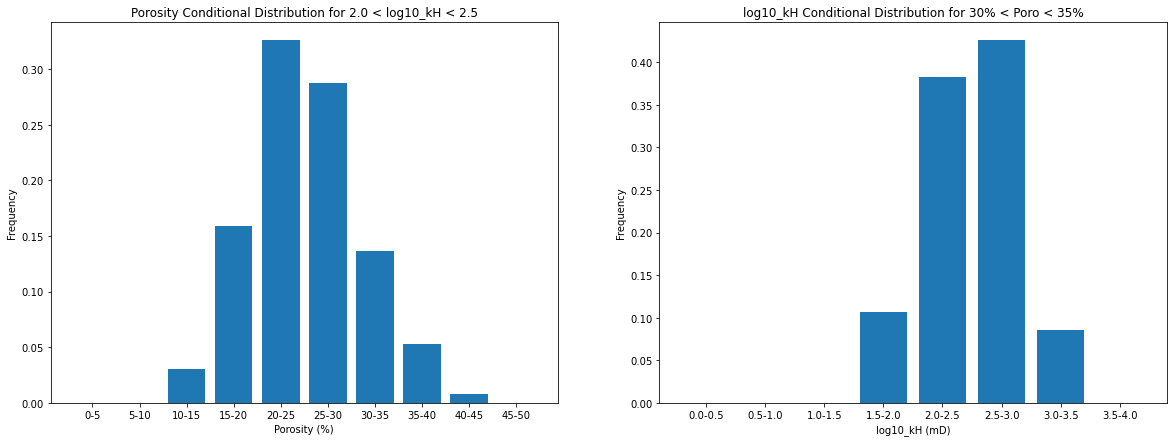

In [12]:
joint_for_poro = norm_pmf[:,4]
poro_given_log10 = joint_for_poro / log10_kH_marg[4] 

joint_for_log10_kH = norm_pmf[6,:]
log10_given_poro = joint_for_log10_kH / poro_marg[6]

fig, axes = plt.subplots(1, 2, figsize = (20, 7)) 
  
axes[0].bar(x_poro, poro_given_log10) 
axes[0].set_xlabel("Porosity (%)")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Porosity Conditional Distribution for 2.0 < log10_kH < 2.5")
              
axes[1].bar(x_log10_kH, log10_given_poro) 
axes[1].set_xlabel("log10_kH (mD)")
axes[1].set_ylabel("Frequency")
axes[1].set_title("log10_kH Conditional Distribution for 30% < Poro < 35%")
  
plt.show() 

---
<span style='color:Blue'>
    
### Problem 2 - Correlation (“scatterplots_DATA.xlsx”)
    
</span>

---

---
<span style='color:Blue'>
    
* a) Use Pandas and Numpy libraries to calculate both the covariance and correlation 
   coefficient between
    
    * i) Porosity and Permeability (kH)
    
    * ii) Porosity and Log10 kH
    
    * iii) Horizontal Permeability (hK) and Vertical Permeability (kV) - using the first 100 data points from the “Scatterplots” sheet
    
    * iv) Log10 kH and Log10 kV - using the first 100 data points from the “Scatterplots” sheet
    
</span>

---

---
<span style='color:Blue'>
    
Read excel file
    
</span>

---

In [13]:
file_name2 = '../data/scatterplots_DATA.csv'
df = pd.read_csv(file_name2) 
df.head(10)

,Porosity,kH,kV
0,30.3,442.5,366.2
1,39.8,729.6,476.7
2,37.5,436.1,92.6
3,14.7,44.2,39.0
4,23.7,35.3,25.2
5,25.0,72.1,43.1
6,33.8,2715.6,2026.7
7,12.0,44.0,32.5
8,20.5,157.3,131.8
9,7.8,24.3,18.8


---
<span style='color:Blue'>
    
i. Between Porosity and Permeability
    
</span>

---

---
<span style='color:Blue'>
    
Assign columns to variable names
    
</span>

---

In [ ]:
#poro = df['Porosity']
#kH = df['kH']
#kV = df['kV']

---
<span style='color:Blue'>
    
Calculate covariance and correlation
    
</span>

---

In [14]:
cov = df.cov() 
cov

,Porosity,kH,kV
Porosity,87.526393,2071.785818,1341.968331
kH,2071.785818,144176.675184,91178.463327
kV,1341.968331,91178.463327,65041.751970


---
<span style='color:Blue'>
    
Note that the pandas.DataFrame.cov function calculate the sample covariance by default. For population covarience set ddof = 0
    
</span>

---

---
<span style='color:Blue'>
    
Correlation
    
</span>

---

In [15]:
corr = df.corr()
corr

,Porosity,kH,kV
Porosity,1.000000,0.583214,0.562441
kH,0.583214,1.000000,0.941561
kV,0.562441,0.941561,1.000000


---
<span style='color:Blue'>
    
Identify and print the covariance and correlation.
    
</span>

---

In [16]:
print(f'Covariance between kV and kH = {round(cov.iloc[1, 2], 2)}')
print(f'Correlation between kV and kH = {round(corr.iloc[1, 2], 4)}')

Covariance between kV and kH = 91178.46
Correlation between kV and kH = 0.9416


---
<span style='color:Blue'>
    
ii. Porosity and Log10kH
    
</span>

---

---
<span style='color:Blue'>
    
Start by calculating $log10 ( kH )$ and $log 10 ( kV )$ and place them in new columns in the same dataframe
    
</span>

---

In [17]:
df['log10kH'] = np.log10(df['kH'])
df['log10kV'] = np.log10(df['kV'])
df.head()

,Porosity,kH,kV,log10kH,log10kV
0,30.3,442.5,366.2,2.645913,2.563718
1,39.8,729.6,476.7,2.863085,2.678245
2,37.5,436.1,92.6,2.639586,1.966611
3,14.7,44.2,39.0,1.645422,1.591065
4,23.7,35.3,25.2,1.547775,1.401401


---
<span style='color:Blue'>
    
We can then simply use the pandas covariance and correlation function to answer Problem 2 part (ii)
    
</span>

---

In [18]:
cov = df.cov()
cov

,Porosity,kH,kV,log10kH,log10kV
Porosity,87.526393,2071.785818,1341.968331,3.981721,3.936466
kH,2071.785818,144176.675184,91178.463327,156.915093,156.451679
kV,1341.968331,91178.463327,65041.751970,102.131601,109.082944
log10kH,3.981721,156.915093,102.131601,0.287401,0.290282
log10kV,3.936466,156.451679,109.082944,0.290282,0.322707


In [19]:
corr = df.corr()
corr

,Porosity,kH,kV,log10kH,log10kV
Porosity,1.000000,0.583214,0.562441,0.793884,0.740683
kH,0.583214,1.000000,0.941561,0.770855,0.725318
kV,0.562441,0.941561,1.000000,0.746998,0.752933
log10kH,0.793884,0.770855,0.746998,1.000000,0.953173
log10kV,0.740683,0.725318,0.752933,0.953173,1.000000


In [20]:
print(f'Covariance between Porosity and log10_kH = {round(cov.iloc[0, 4], 2)}')
print(f'Correlation between Porosity and log10_kH = {round(corr.iloc[0, 4], 4)}')

Covariance between Porosity and log10_kH = 3.94
Correlation between Porosity and log10_kH = 0.7407


---
<span style='color:Blue'>
    
iii. Horizontal Permeability $(hK)$ and Vertical Permeability $(kV)$ - using the first 100 data points

iv. $log 10 ( kH 0$ and $log 10 ( kV )$ - using the first 100 data points
    
</span>

---

---
<span style='color:Blue'>
    
Extract the first 100 rows from df and look at the tail (remember that the index shown in the first column starts at [0]
    
</span>

---

In [21]:
df_100 = df.head(100)
df_100.tail(10)

,Porosity,kH,kV,log10kH,log10kV
90,26.1,357.3,208.4,2.553033,2.318898
91,10.1,37.5,25.7,1.574031,1.409933
92,25.8,263.1,238.9,2.420121,2.378216
93,23.6,571.4,355.6,2.756940,2.550962
94,19.3,25.3,22.6,1.403121,1.354108
95,21.2,120.4,39.7,2.080626,1.598791
96,41.4,229.7,72.6,2.361161,1.860937
97,21.5,66.6,35.3,1.823474,1.547775
98,20.3,176.7,160.7,2.247237,2.206016
99,5.6,63.3,31.0,1.801404,1.491362


---
<span style='color:Blue'>
    
Again, use the pandas covariance and correlation functions as asked for
    
</span>

---

In [22]:
# Create a copy of the slice to avoid SettingWithCopyWarning
df_100 = df_100.copy()

# Now you can safely create new columns
df_100['log10kH'] = np.log10(df_100['kH'])
df_100['log10kV'] = np.log10(df_100['kV'])

# Display the first few rows
df_100.head()

,Porosity,kH,kV,log10kH,log10kV
0,30.3,442.5,366.2,2.645913,2.563718
1,39.8,729.6,476.7,2.863085,2.678245
2,37.5,436.1,92.6,2.639586,1.966611
3,14.7,44.2,39.0,1.645422,1.591065
4,23.7,35.3,25.2,1.547775,1.401401


In [23]:
cov = df_100.cov()
corr = df_100.corr()

In [24]:
cov

,Porosity,kH,kV,log10kH,log10kV
Porosity,86.622287,2357.340097,1302.338590,4.051405,3.676002
kH,2357.340097,205089.216307,111711.738238,190.736137,172.930909
kV,1302.338590,111711.738238,78727.023075,108.672180,112.657620
log10kH,4.051405,190.736137,108.672180,0.297293,0.280077
log10kV,3.676002,172.930909,112.657620,0.280077,0.291173


In [25]:
corr

,Porosity,kH,kV,log10kH,log10kV
Porosity,1.000000,0.559289,0.498709,0.798359,0.731956
kH,0.559289,1.000000,0.879155,0.772447,0.707661
kV,0.498709,0.879155,1.000000,0.710336,0.744085
log10kH,0.798359,0.772447,0.710336,1.000000,0.951938
log10kV,0.731956,0.707661,0.744085,0.951938,1.000000


In [27]:
print(f"""
First 100 data points;
Covariance between kH and kV = {cov.iloc[1, 2]:.2f}
Correlation between kH and kV = {corr.iloc[1, 2]:.4f}
Covariance between log10_kV and log10_kH = {cov.iloc[4, 3]:.4f}
Correlation between log10_kV and log10_kH = {corr.iloc[4, 3]:.4f}
""")


First 100 data points;
Covariance between kH and kV = 111711.74
Correlation between kH and kV = 0.8792
Covariance between log10_kV and log10_kH = 0.2801
Correlation between log10_kV and log10_kH = 0.9519



---
<span style='color:Blue'>
    
b) Use Numpy library functions to calculate the rank correlation coefficient between
    
</span>

---

---
<span style='color:Blue'>
    
i. Porosity and Permeability (kH)
    
</span>

---

---
<span style='color:Blue'>
    
We can use the pandas covariance function for this but lets first do this manually:

Step 1: Rank the data
    
Step 2: Use the Pearson correlation function on the ranked data to find the Spearman rank correlation
    
</span>

---

In [28]:
df_ranked = pd.DataFrame(columns=['Porosity', 'kH'])
df_ranked['Porosity'] = df['Porosity'].rank()
df_ranked['kH'] = df['kH'].rank()
df_ranked.head()

,Porosity,kH
0,423.5,442.0
1,489.0,467.0
2,481.0,441.0
3,141.5,155.0
4,319.0,120.0


---
<span style='color:Blue'>
    
Calculate the Spearman rank correlation as before
    
</span>

---

In [29]:
df_ranked.cov()

,Porosity,kH
Porosity,20874.800601,16504.833667
kH,16504.833667,20874.990982


---
<span style='color:Blue'>
    
Correlation
    
</span>

---

In [30]:
df_ranked.corr()

,Porosity,kH
Porosity,1.000000,0.790655
kH,0.790655,1.000000


---
<span style='color:Blue'>
    
Compare with the built in Spearman correlation function
    
</span>

---

In [31]:
df.corr(method='spearman')

,Porosity,kH,kV,log10kH,log10kV
Porosity,1.000000,0.790655,0.737092,0.790655,0.737092
kH,0.790655,1.000000,0.950190,1.000000,0.950190
kV,0.737092,0.950190,1.000000,0.950190,1.000000
log10kH,0.790655,1.000000,0.950190,1.000000,0.950190
log10kV,0.737092,0.950190,1.000000,0.950190,1.000000


---
<span style='color:Blue'>
    
Got the same answer.
    
</span>

---

---
<span style='color:Blue'>
    
b) ii. Now let's do this using the first 100 points only.
    
</span>

---

In [32]:
df_100.corr(method='spearman')

,Porosity,kH,kV,log10kH,log10kV
Porosity,1.000000,0.802592,0.748661,0.802592,0.748661
kH,0.802592,1.000000,0.953483,1.000000,0.953483
kV,0.748661,0.953483,1.000000,0.953483,1.000000
log10kH,0.802592,1.000000,0.953483,1.000000,0.953483
log10kV,0.748661,0.953483,1.000000,0.953483,1.000000


---
<span style='color:Blue'>
    
c) Why is there no point in calculating the Rank Correlation between Porosity and Log10 kH?
    
</span>

---

---
<span style='color:Blue'>
    
As we see from the results above, the correlations are almost the same, $Pearson \; r \approx Spearman \; \rho$. This is because the permeabilities have been "linearized" through the use of the log10 transformation.
    
</span>

---

---
<span style='color:Blue'>
    
### Problem 3 - Regression ('regress_DATA.xlsx')
    
</span>

---

In [33]:
file_name3 = '../data/regress_DATA.csv'
df = pd.read_csv(file_name3) 
df.head(10)

,Poro,Perm
0,30.31,442.55
1,39.77,729.56
2,37.49,436.13
3,14.70,44.16
4,23.69,35.28
5,25.03,72.13
6,33.79,2715.63
7,11.98,44.01
8,20.46,157.29
9,7.80,24.33


---
<span style='color:Blue'>
    
a) Calculate the $m$ and $b$ coefficients of a linear predictor of permeability from porosity (think carefully about exactly what variables you will use!). Which is the independent variable and which is the dependent variable?


    
</span>

---

---
<span style='color:Blue'>
    
We will use Porosity as the independent variable and Permeability as the independent. Let's start by looking at a scatter plot of the two.
    
</span>

---

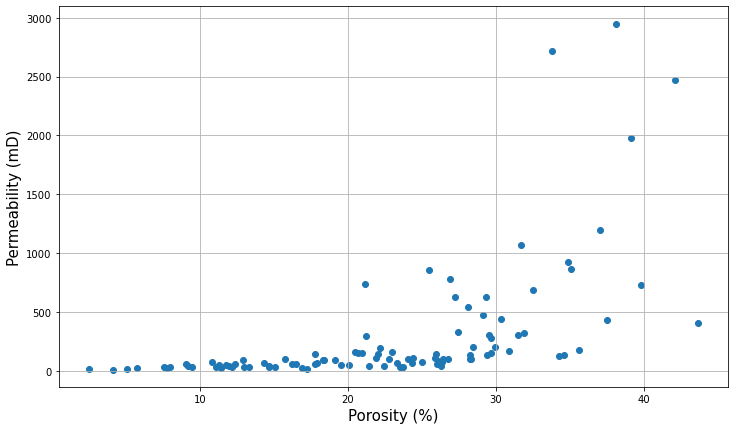

In [34]:
x = df["Poro"]
y = df["Perm"]

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, y)
ax.set_xlabel(r'Porosity (%)', fontsize=15)
ax.set_ylabel(r'Permeability (mD)', fontsize=15)
ax.grid()

---
<span style='color:Blue'>
    
Clearly, linear regression is not relevant for this data set unless we can transform one of the variables to linearize the data.

As we've seen in the video lectures, use a log10-transformation for the permeability data often linerarize the data so let's try that.
    
</span>

---

In [35]:
df['log10Perm'] = np.log10(df['Perm'])
df.head()

,Poro,Perm,log10Perm
0,30.31,442.55,2.645962
1,39.77,729.56,2.863061
2,37.49,436.13,2.639616
3,14.70,44.16,1.645029
4,23.69,35.28,1.547529


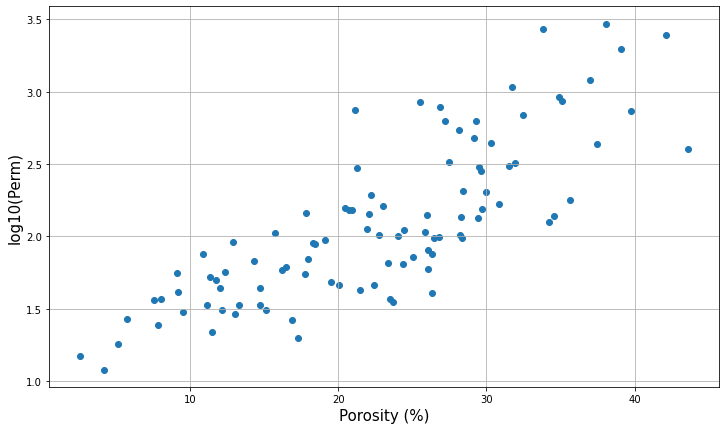

In [36]:
x = df["Poro"]
y_log10Perm = df["log10Perm"]

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, y_log10Perm)
ax.set_xlabel(r'Porosity (%)', fontsize=15)
ax.set_ylabel(r'log10(Perm)', fontsize=15)
ax.grid()

---
<span style='color:Blue'>
    
This looks much more linear.
    
</span>

---

---
<span style='color:Blue'>
    
Let's use the equations provided in the lectures to calculate the slope $m$ and intersection $b$ for the linear regression line.

Equantions for the linear regression equation

$$
\hat{y} = mx + b
$$

where

$$
b = \frac{ \left( \sum{y} \right) \left( \sum{x^2} \right) - \left( \sum{x} \right) \left( \sum{xy} \right)}{n \left( \sum{x^2} \right) - \left( \sum{x} \right)^2}
$$

and

$$
m = \frac{ n \left( \sum{xy} \right) - \left( \sum{x} \right) \left( \sum{y} \right)}{n \left( \sum{x^2} \right) - \left( \sum{x} \right)^2}
$$
    
</span>

---

In [37]:
sum_x = x.sum()
sum_y = y_log10Perm.sum()
xy = x * y_log10Perm
sum_xy = xy.sum()
x2 = x ** 2
y2 = y_log10Perm ** 2
sum_x2 = x2.sum()
sum_y2 = y2.sum()
n = len(x)

b = (sum_y * sum_x2 - sum_x * sum_xy) / (n * sum_x2 - sum_x ** 2)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_x2 - sum_x ** 2)

pearson_r = (n * sum_xy - sum_x * sum_y) / np.sqrt((n * sum_x2 - sum_x**2) * ( n * sum_y2 - sum_y**2))

display(Math(f'm = {m:.4f}'))
display(Math(f'b = {b:.4f}'))
display(Math(f'Pearson \\; r = {pearson_r:.4f}'))
display(Math(f'R^2 = {pearson_r**2:.4f}'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

---
<span style='color:Blue'>
    
b) Use the regression line to predict the permeability variable for each porosity measurement. Create a scatter plot of the data pairs as points and also plot the predicted line.
    
</span>

---

In [39]:
y_hat = b + m * x

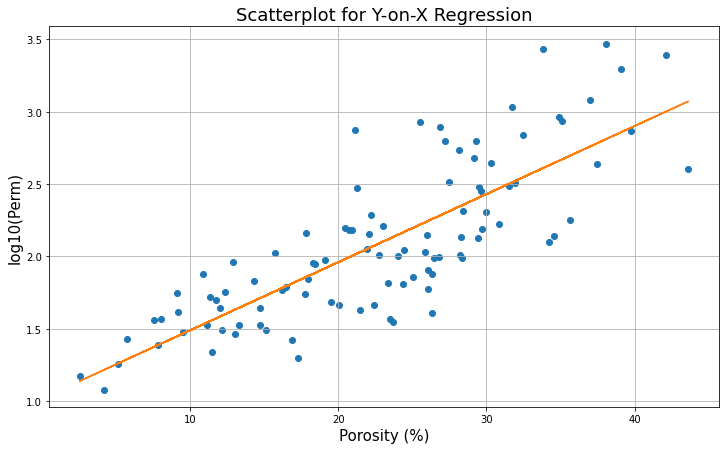

In [40]:
# Convert to NumPy arrays
x_array = x.to_numpy()
y_log10Perm_array = y_log10Perm.to_numpy()
y_hat_array = y_hat.to_numpy()

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x_array, y_log10Perm_array)
ax.plot(x_array, y_hat_array, color='tab:orange')  # Using 'color' instead of 'tab:orange' as a string
ax.set_xlabel('Porosity (%)', fontsize=15)
ax.set_ylabel('log10(Perm)', fontsize=15)
plt.title("Scatterplot for Y-on-X Regression", fontsize=18)
ax.grid()

plt.show()

---
<span style='color:Blue'>
    
c) Calculate the residuals and plot them against the porosity (independent variable). Calculate the correlation coefficient between them. Comment on how good the predictor is.
    
</span>

---

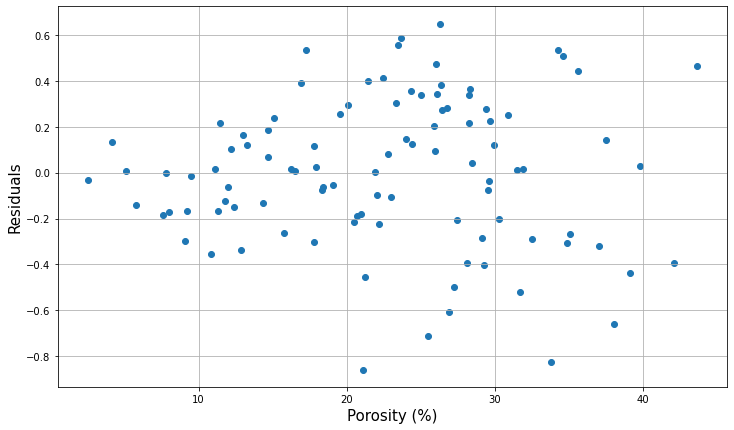

In [41]:
residuals = y_hat - y_log10Perm

fig, ax = plt.subplots(figsize=(12,7))
ax.scatter(x, residuals)
ax.set_xlabel(r'Porosity (%)', fontsize=15)
ax.set_ylabel(r'Residuals', fontsize=15)
ax.grid()

In [43]:
corr = np.corrcoef(residuals, x)
print(f'Correlation between residuals and independent variable = {corr[0, 1]:.6f}')

Correlation between residuals and independent variable = -0.000000


---
<span style='color:Blue'>
    
This shows that the predictor is very good (no correlation between residuals and independent variable).
    
</span>

---

---
<span style='color:Blue'>
    
d) Plot a histogram of both the predicted and actual permeability data. Also calculate the variance of each. Observe and explain the difference between them.
    
</span>

---

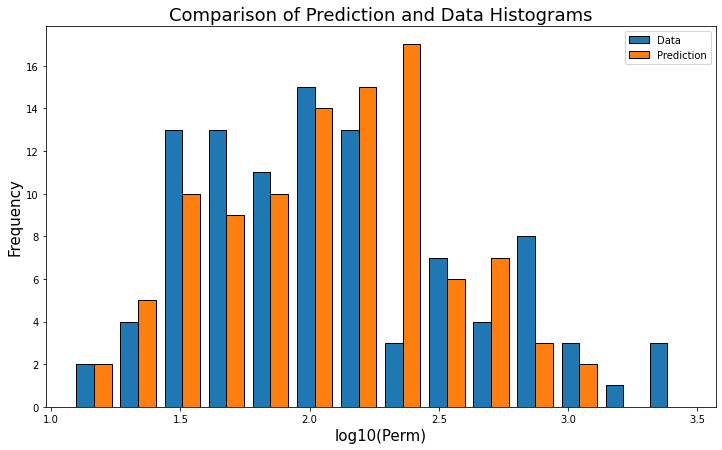

In [47]:
plt.figure(figsize=(12,7))
plt.hist([y_log10Perm, y_hat], bins=14, edgecolor='k', label=['Data', 'Prediction'])  # Added label argument here
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('log10(Perm)', fontsize=15)
plt.title("Comparison of Prediction and Data Histograms", fontsize=18)
plt.legend()
plt.show()

---
<span style='color:Blue'>
    
### Problem 4: Spatial Correlations ('covar_correl_semivario_DATA.xlsx')
</span>

---

---
<span style='color:Blue'>
    
There are 6 sets of equally spaced Log Data in the “Well_Data” sheet. The first column shows the depth.
    
a) Calculate number of data points, mean and variance for each data set

</span>

---

In [48]:
file_name4 = '../data/covar_correl_semivario_DATA.csv'
df = pd.read_csv(file_name4) 
df.head(10)

,Depth,DT,CALI,GR,RHOB,DRHO,PORO
0,5613.0,89.334702,9.1950,80.159203,2.4681,0.0038,0.112284
1,5613.5,90.328300,9.2349,81.159401,2.4620,0.0035,0.116049
2,5614.0,92.822998,9.2481,80.961304,2.4616,0.0143,0.116296
3,5614.5,93.838699,9.2481,79.565201,2.4266,0.0177,0.137901
4,5615.0,94.434898,9.2214,78.967598,2.4069,0.0217,0.150062
5,5615.5,94.633797,9.2480,78.370300,2.4016,0.0204,0.153333
6,5616.0,94.700302,9.1947,76.374802,2.4083,0.0151,0.149198
7,5616.5,94.700500,9.2479,76.775902,2.4063,0.0156,0.150432
8,5617.0,94.568199,9.2878,77.775902,2.3938,0.0095,0.158148
9,5617.5,93.839996,9.2877,77.777702,2.3786,0.0050,0.167531


In [49]:
depth = df['Depth']
n_points = len(depth)
n_points

df.mean()

df.var(ddof=1)

print(f'The Number of data points is {n_points:.0f}')

print(f'\nThe means are\n{df.mean().round(2)}')

print(f'\nThe variances are\n{df.var().round(4)}')


The Number of data points is 320

The means are
Depth    5692.75
DT         80.47
CALI        9.31
GR         75.53
RHOB        2.50
DRHO        0.01
PORO        0.09
dtype: float64

The variances are
Depth    2140.0000
DT         48.8480
CALI        0.0049
GR        171.4744
RHOB        0.0045
DRHO        0.0003
PORO        0.0017
dtype: float64


---
<span style='color:Blue'>
    
b) For each of the log data sets, create a plot of the data versus depth (a log trace) – with depth on the y- axis, shallowest depth at the TOP.

</span>

---

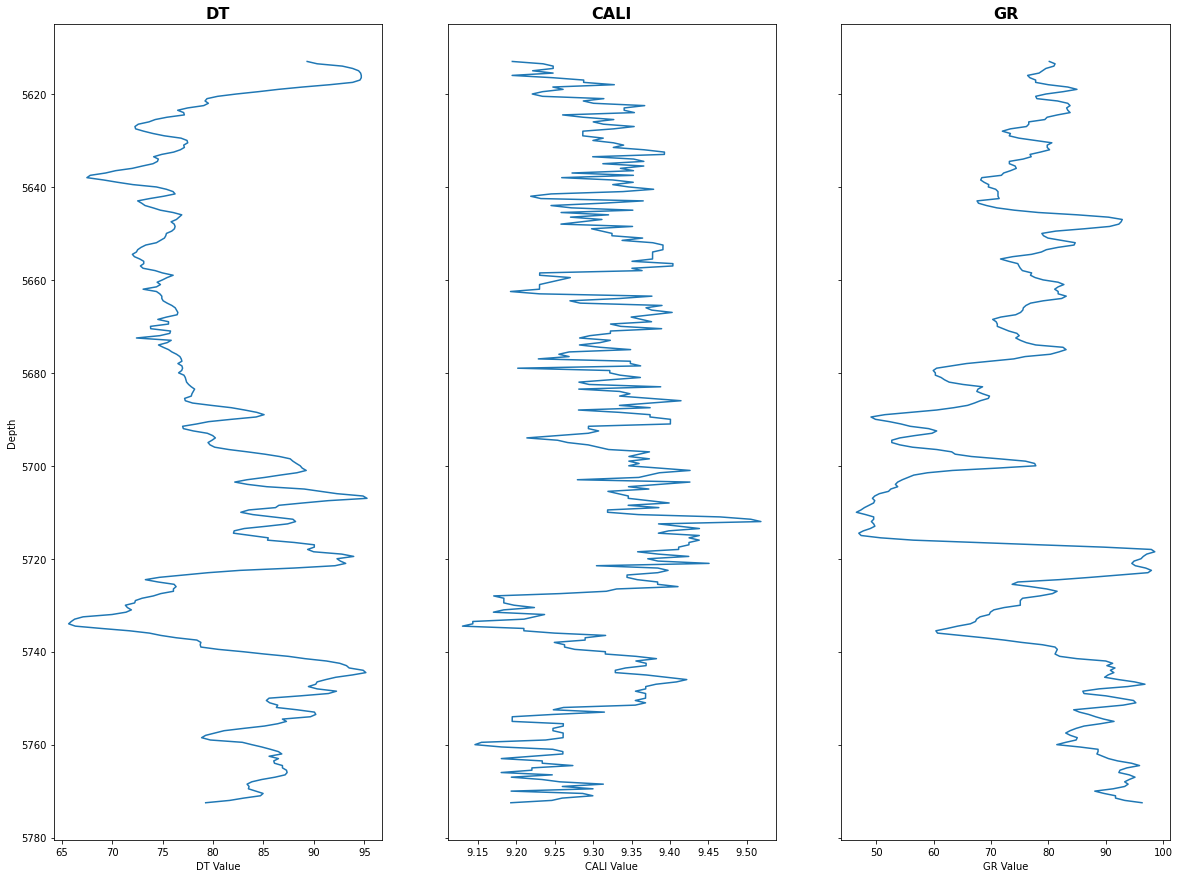

In [50]:
depth = df['Depth'].to_numpy()
DT = df['DT'].to_numpy()
CALI = df['CALI'].to_numpy()
GR = df['GR'].to_numpy()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 15), sharey=True)

# Inverting y-axis for depth
ax1.invert_yaxis()

ax1.plot(DT, depth)
ax1.set_title("DT", fontsize=16, fontweight='bold')
ax1.set_xlabel("DT Value")
ax1.set_ylabel('Depth')

ax2.plot(CALI, depth)
ax2.set_title("CALI", fontsize=16, fontweight='bold')
ax2.set_xlabel("CALI Value")

ax3.plot(GR, depth)
ax3.set_title("GR", fontsize=16, fontweight='bold')
ax3.set_xlabel("GR Value")

plt.show()


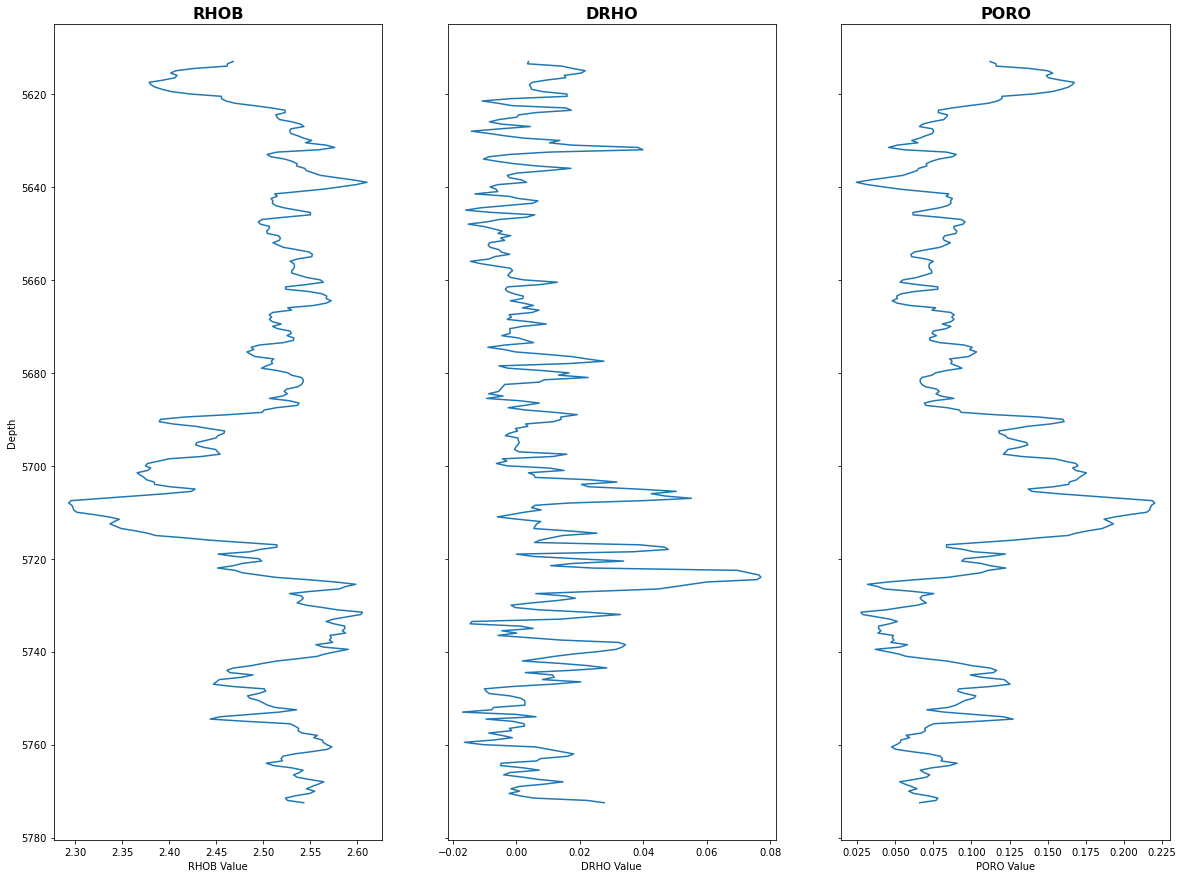

In [51]:
depth = df['Depth'].to_numpy()
RHOB = df['RHOB'].to_numpy()
DRHO = df['DRHO'].to_numpy()
PORO = df['PORO'].to_numpy()

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 15), sharey=True)

# Inverting y-axis for depth
ax1.invert_yaxis()

ax1.plot(RHOB, depth)
ax1.set_title("RHOB", fontsize=16, fontweight='bold')
ax1.set_xlabel("RHOB Value")
ax1.set_ylabel('Depth')

ax2.plot(DRHO, depth)
ax2.set_title("DRHO", fontsize=16, fontweight='bold')
ax2.set_xlabel("DRHO Value")

ax3.plot(PORO, depth)
ax3.set_title("PORO", fontsize=16, fontweight='bold')
ax3.set_xlabel("PORO Value")

plt.show()


---
<span style='color:Blue'>
    
c)    For lags from 0 to 150 in steps of 1, calculaten steps of 1. Plot both on a single chart.
    
i. The Covariance function
    
ii. The Correlogram
    
iii. The Semi-variogram
    
d) Plot all three functions on a single graph (Hint: functions will display best if you put the Semi-Variogram and Covariance on the primary y-axis and the Correlogram on the Secondary y-axis)
    
Let's set this up in such a way that we can type in the variable name and then have the chart being created for that variable.
    
</span>

--- 

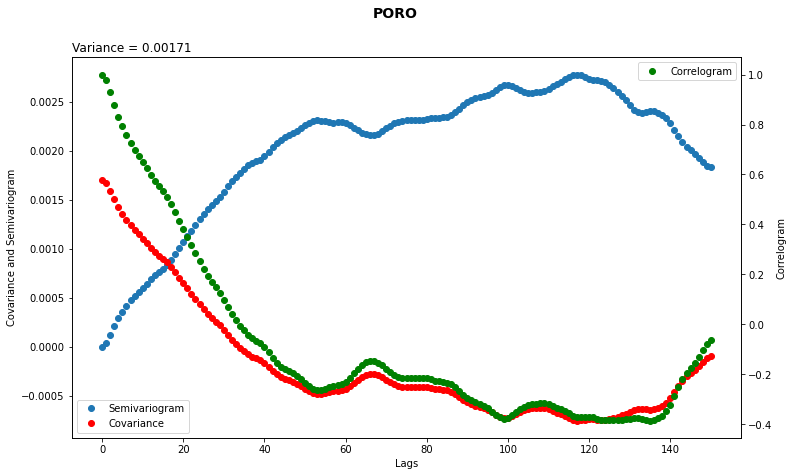

In [54]:
variable = 'PORO'
data = df[variable]
data = np.asarray(data)
n_lags = 150
variogram = np.zeros(n_lags+1)
variance = np.var(data)
cov_h = np.zeros(n_lags+1)
cov_h[0] = variance
corr_h = np.zeros(n_lags+1)
corr_h[0] = 1
for lags in range(1, n_lags+1):
    nh = len(data) - lags
    variogram[lags] = (1 / (2 * nh)) * np.sum(np.power((data[lags:] - data[:-lags]), 2))
    cov_h[lags] = (1 / (nh - 1)) * (np.asmatrix(data[lags:] - np.mean(data[lags:])) * np.asmatrix(data[:-lags] - np.mean(data[:-lags])).T)
    corr_h[lags] = cov_h[lags] / (np.std(data[lags:]) * np.std(data[:-lags]))
var = np.var(data, ddof=1)

fig, axis_1 = plt.subplots(figsize=(12, 7))
axis_2 = axis_1.twinx()
axis_1.plot(variogram, 'o', linestyle='none', label='Semivariogram')  # Only markers
axis_1.plot(cov_h, 'o', color='r', linestyle='none', label='Covariance')  # Only markers
axis_2.plot(corr_h, 'o', color='g', linestyle='none', label='Correlogram')  # Only markers
axis_1.set_ylabel('Covariance and Semivariogram')
axis_1.set_xlabel('Lags')
axis_2.set_ylabel('Correlogram')
axis_1.legend(loc='lower left')
axis_2.legend(loc='upper right')
fig.suptitle(variable, fontsize=14, fontweight='bold')
axis_1.set_title(f"Variance = {var:.5f}", fontsize=12, loc='left')
plt.show()


---
<span style='color:Blue'>
    
f) What do you notice about the relationship between the Correlogram, Covariance Function and Semi-variogram?

* The semivariogram is the inverse of the covariance. The correlogram tracks the covariance closely.
    
g) What do you observe about the relationship between the data and the semivariograms?
    
* The semivariogram levels off at some distance (lags) from the origin.
    
h) Estimate the range and sill for each semi-variogram?

</span>

* DT: $Range \sim 40$, $sill \sim 50$
* CALI: $Range \sim 20$, $sill \sim 0.005$
* GR: $Range \sim 30$, $sill \sim 125$
* RHOB: $Range \sim 50$, $sill \sim 0.006$
* DRHO: $Range \sim 10$, $sill \sim 0.000225$
* PORO: $Range \sim 50$, $sill \sim 0.00225$  
    
<span style='color:Blue'>   
i) What do you observe about the relationship between the sills and the variances
</span>
    
Variances
* DT: 48.84805
* CALI: 0.00488
* GR: 171.47440
* RHOB: 0.00449
* DRHO: 0.00026
* PORO: 0.00171

<span style='color:Blue'> 
The sill and variance can be quite different.
</span>

--- 

---
<span style='color:Blue'>
    
### Problem 5: EW and NS Directionalsemi-variograms (“2d_directional_semivariograms_DATA.xlsx”)
    
</span>

---

---
<span style='color:Blue'>
    
a) Using the gridded porosity data in the “grid_data” worksheet, calculate the semi- variograms in the NS and EW directions for lags of 1 to 15 in steps of 1. Plot both on a single chart.
    
</span>

---

---
<span style='color:Blue'>
    
Read and clean the data.
    
</span>

---

In [55]:
file_name4 = '../data/2d_directional_semivariograms_v2_DATA.xlsx'
df = pd.read_excel(file_name4) 
df.head(10)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,16.835904,18.658786,18.832150,19.818449,19.439522,19.549894,20.678720,18.188821,17.337882,...,23.958840,22.069691,23.033891,22.590174,20.813563,19.701985,16.599940,14.871449,14.347081,12.760648
1,2,18.263543,19.584044,18.974337,19.496578,19.029379,19.667150,20.708275,18.539164,17.667542,...,22.933053,22.389079,23.720206,22.860063,22.209521,21.514342,19.238038,17.958892,17.018816,16.325445
2,3,17.799354,17.616518,16.179233,16.472274,15.934735,17.348716,18.053327,17.765830,18.065806,...,21.224637,21.706283,22.657944,21.855913,20.959269,19.839584,19.084629,18.782790,18.098015,18.462910
3,4,17.307676,18.361606,17.280016,16.674519,17.511488,18.587844,19.447731,19.236063,18.498889,...,20.385061,20.923212,21.349303,20.486808,20.363351,19.984354,21.013513,20.844552,20.470994,22.208702
4,5,14.308531,16.576740,16.863928,16.579373,17.904940,18.375735,19.678250,20.311777,18.853231,...,18.234707,18.828703,18.525864,18.638359,18.240124,17.698124,18.794936,18.407496,17.972868,19.963405
5,6,15.570176,18.558815,19.187689,18.840690,20.199000,19.712195,21.526590,21.439000,18.900726,...,16.408368,17.118842,18.077513,18.802970,19.029151,19.767131,21.026859,20.679517,19.481604,20.655053
6,7,16.624379,18.414837,19.471947,19.227251,19.760513,18.679761,20.539897,21.073652,20.017852,...,15.748098,16.856608,18.056346,18.428818,18.228650,18.865268,18.769009,18.959107,18.183263,18.291886
7,8,17.981645,18.309335,18.929583,19.061756,20.142944,19.665766,20.376844,20.449062,20.090784,...,17.787542,18.201587,19.611748,19.771962,19.131340,19.391992,19.733737,19.878233,19.246641,19.053583
8,9,18.099672,17.942696,18.930134,18.952417,19.517073,19.816677,19.333174,19.563980,20.038093,...,19.916352,19.362973,19.998295,19.368048,19.387659,18.840841,18.845216,18.730383,19.397400,19.366344
9,10,18.029734,17.924214,19.306427,18.874746,19.855217,21.105775,19.750404,20.208825,19.927170,...,19.692224,19.571499,19.000864,18.490820,18.930819,17.873616,18.602194,18.633869,18.448069,18.848047


In [56]:
data = df.to_numpy()
#data = data[:,1:]
data.shape

(20, 26)

---
<span style='color:Blue'>
    
Build the variograms in the EW and NS directions for lags of 1 to 15 in steps of 1.
    
Note that we should discard the first point. Conceptually if the lag distance approaches $0$, 
i.e., $\lim_{lag \to 0} Var(lag) = 0$ then it corresponds to nugget value. In practice, this condition is not met so we should discard the $Var = 0$ value. 

    
</span>

---

In [57]:
n_lags = 15
ew_variogram = np.zeros(n_lags+1)
lag = [0]
for lags in range(1,n_lags+1):
    lag.append(lags)
    nh = np.size(data[:,lags:])
    ew_variogram[lags] = ( 1/(2*nh) )*np.sum( ( (data[:,lags:]-data[:,:-lags]) ** 2) ) 
ew_variogram = np.delete(ew_variogram, 0)
lag = np.delete(lag, 0)

ns_variogram = np.zeros(n_lags+1)
for lags in range(1,n_lags+1):
    nh = np.size(data[lags:,:])
    ns_variogram[lags] = ( 1/(2*nh) )*np.sum( ( (data[lags:,:]-data[:-lags,:]) ** 2) )  
ns_variogram = np.delete(ns_variogram, 0)

lag
ew_variogram

array([2.03903313, 2.77351392, 3.26771308, 3.9739503 , 4.64467934,
       5.3624931 , 6.23849227, 6.12342868, 6.11638929, 6.35736916,
       6.10194184, 6.59058853, 6.99475218, 7.29182577, 8.19697568])

---
<span style='color:Blue'>
    
Plot the variograms in a single graph.
    
</span>

---

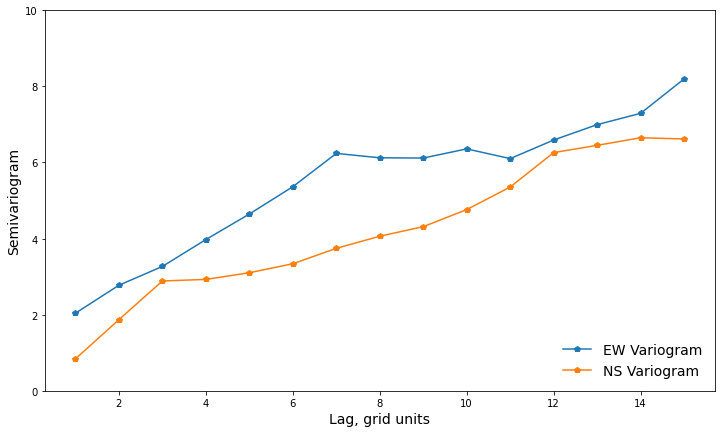

In [58]:
fig, ax = plt.subplots(figsize=(12,7))

ax.plot(lag, ew_variogram, '-p', label="EW Variogram")
ax.plot(lag, ns_variogram, '-p', label="NS Variogram")
ax.legend(loc='lower right', frameon=False, fontsize=14)
ax.set_xlabel('Lag, grid units', fontsize=14)
ax.set_ylabel('Semivariogram', fontsize=14)
#ax.set_xlim(0, 4)
ax.xaxis.get_major_locator().set_params(integer=True)
ax.set_ylim(0, 10)
#axs[0].grid(True)

plt.show()

---
<span style='color:Blue'>
    
b) Calculate the variance of the data. How does it compare with the sill?
</span>

---

In [59]:
variance = np.var(data)
print("The variance of the data is", np.round(variance, 4))

The variance of the data is 6.9021


---
<span style='color:Blue'>
    
c) What are the ranges of the two variograms?

---

---
<span style='color:Blue'>
    
Inspecting the variograms, and taking note of the variance (which should be close to the sill), we can reasonably set the range in the EW direction to about 7 and in the NS direction to about 3.

---

---
<span style='color:Blue'>
    
This is beyond the assignment.
    
It is, in general, useful to also plot the number of datapoints included in the variogram for each lag, i.e., $N(h)$.

In the following we will use Pandas DataFrame for this purpose (not he only way to do it).
</span>

---

---
<span style='color:Blue'>
    
Let's do the EW semivariogram first
</span>

---

In [60]:
n_lags = 15
ew_variogram = np.zeros(n_lags+1)
ew_vario = []
for lags in range(1,n_lags+1):
    nh = np.size(data[:,lags:])
    ew_variogram[lags] = ( 1/(2*nh) )*np.sum( ( (data[:,lags:]-data[:,:-lags]) ** 2) ) 
    ew_vario.append((lags, nh, ew_variogram[lags]))

print(ew_vario)
ew_v = DataFrame(ew_vario)
ew_v.columns = ['Lags', 'Nh', 'Variogram']
ew_v

[(1, 500, 2.0390331339613734), (2, 480, 2.7735139193844534), (3, 460, 3.267713079062612), (4, 440, 3.9739503020226343), (5, 420, 4.644679344813456), (6, 400, 5.362493103157304), (7, 380, 6.238492265582285), (8, 360, 6.123428681822178), (9, 340, 6.116389285657351), (10, 320, 6.357369161309967), (11, 300, 6.101941836201018), (12, 280, 6.590588528668507), (13, 260, 6.994752181067302), (14, 240, 7.291825765834458), (15, 220, 8.196975684544181)]


,Lags,Nh,Variogram
0,1,500,2.039033
1,2,480,2.773514
2,3,460,3.267713
3,4,440,3.973950
4,5,420,4.644679
5,6,400,5.362493
6,7,380,6.238492
7,8,360,6.123429
8,9,340,6.116389
9,10,320,6.357369


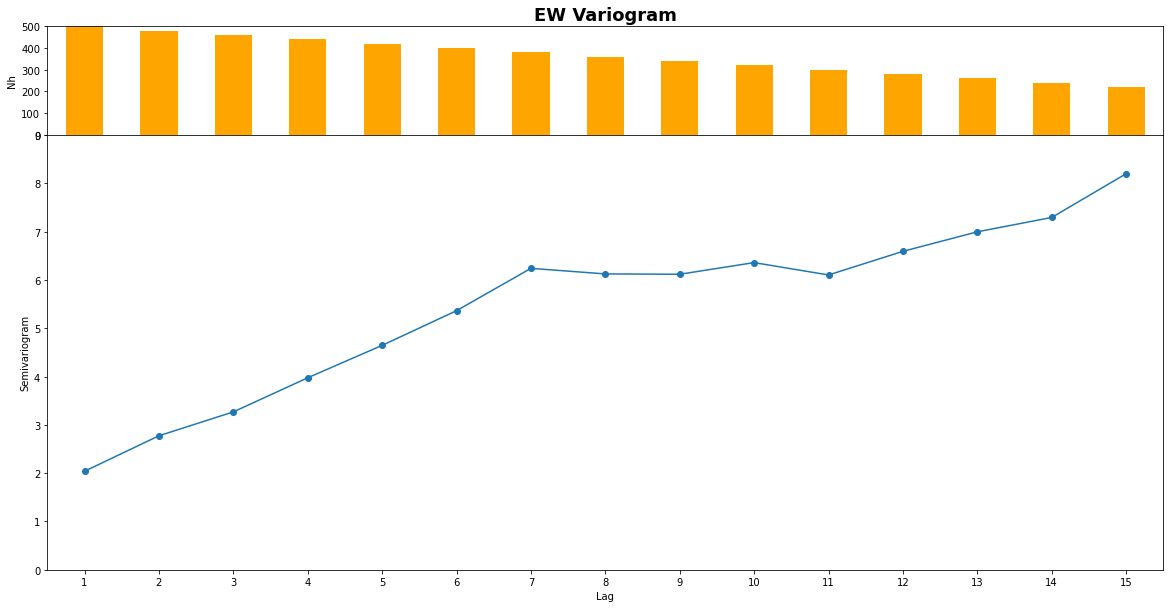

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [1, 4]})
ew_v.plot(x=None, y=['Variogram'], ax=axes[1], kind='line', marker='o', legend=False)
ew_v.plot(x='Lags', y=['Nh'],ax=axes[0], kind='bar', color="orange", legend=False)
axes[1].set_xlabel("Lag")
axes[1].set_ylabel("Semivariogram")
axes[0].set_ylabel("Nh")
axes[0].set_title("EW Variogram", fontsize=18, fontweight='bold')
axes[1].set_ylim(0, 9)
axes[0].set_ylim(0, 500)
#ax.xaxis.get_major_locator().set_params(integer=True)
plt.subplots_adjust(hspace=0.)

---
<span style='color:Blue'>
    
Now the NS semivariogram.
</span>

---

In [61]:
n_lags = 15
ns_variogram = np.zeros(n_lags+1)
ns_vario=[]
for lags in range(1,n_lags+1):
    nh = np.size(data[lags:,:])
    ns_variogram[lags] = ( 1/(2*nh) )*np.sum( ( (data[lags:,:]-data[:-lags,:]) ** 2) )  
    ns_vario.append((lags, nh, ns_variogram[lags]))
ns_variogram = np.delete(ns_variogram, 0)
    
ns_v = DataFrame(ns_vario)
ns_v.columns = ['Lags', 'Nh', 'Variogram']

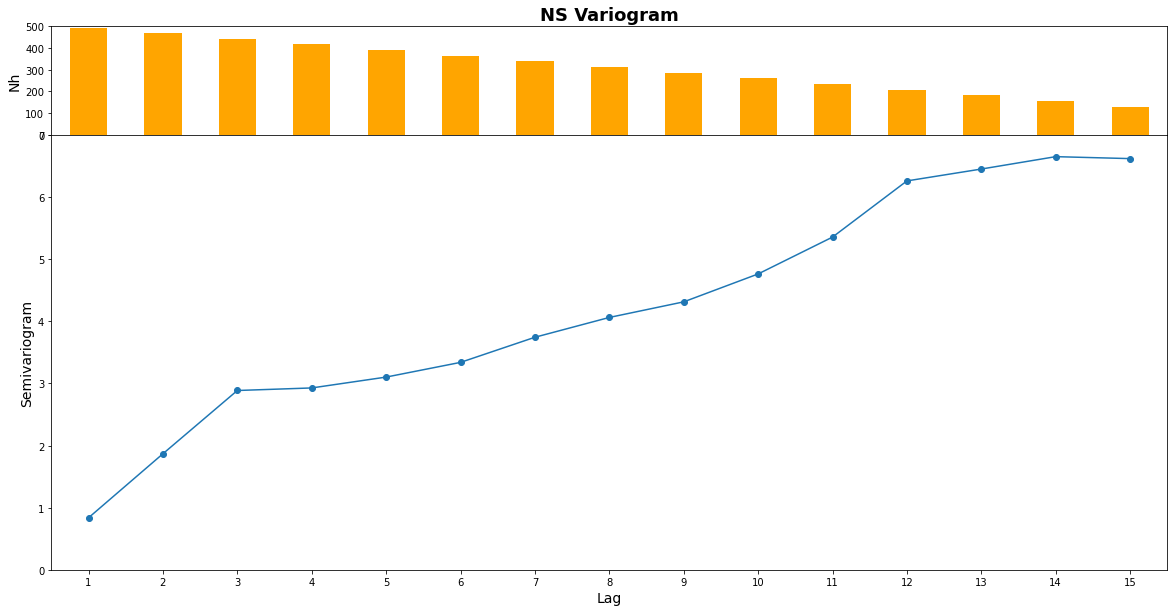

In [72]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [1, 4]})
ns_v.plot(x=None, y=['Variogram'], ax=axes[1], kind='line', marker='o', legend=False)
ns_v.plot(x='Lags', y=['Nh'],ax=axes[0], kind='bar', color="orange", legend=False)
axes[1].set_xlabel("Lag", fontsize=14)
axes[1].set_ylabel("Semivariogram", fontsize=14)
axes[0].set_ylabel("Nh", fontsize=14)
axes[0].set_title("NS Variogram", fontsize=18, fontweight='bold')
axes[1].set_ylim(0, 7)
axes[0].set_ylim(0, 500)
#ax.xaxis.get_major_locator().set_params(integer=True)
plt.subplots_adjust(hspace=0.)

---
<span style='color:Blue'>
    
In this case the number of data points even for lag = 15 is large enough for the results to be statistically meaningful. However, if the lag size is big enough, the will not be the case.
    
Let's try with a lag of 20
</span>

---


In [62]:
n_lags = 19
ns_variogram = np.zeros(n_lags+1)
ns_vario=[]
for lags in range(1,n_lags+1):
    nh = np.size(data[lags:,:])
    ns_variogram[lags] = ( 1/(2*nh) )*np.sum( ( (data[lags:,:]-data[:-lags,:]) ** 2) )  
    ns_vario.append((lags, nh, ns_variogram[lags]))
ns_variogram = np.delete(ns_variogram, 0)
    
ns_v = DataFrame(ns_vario)
ns_v.columns = ['Lags', 'Nh', 'Variogram']

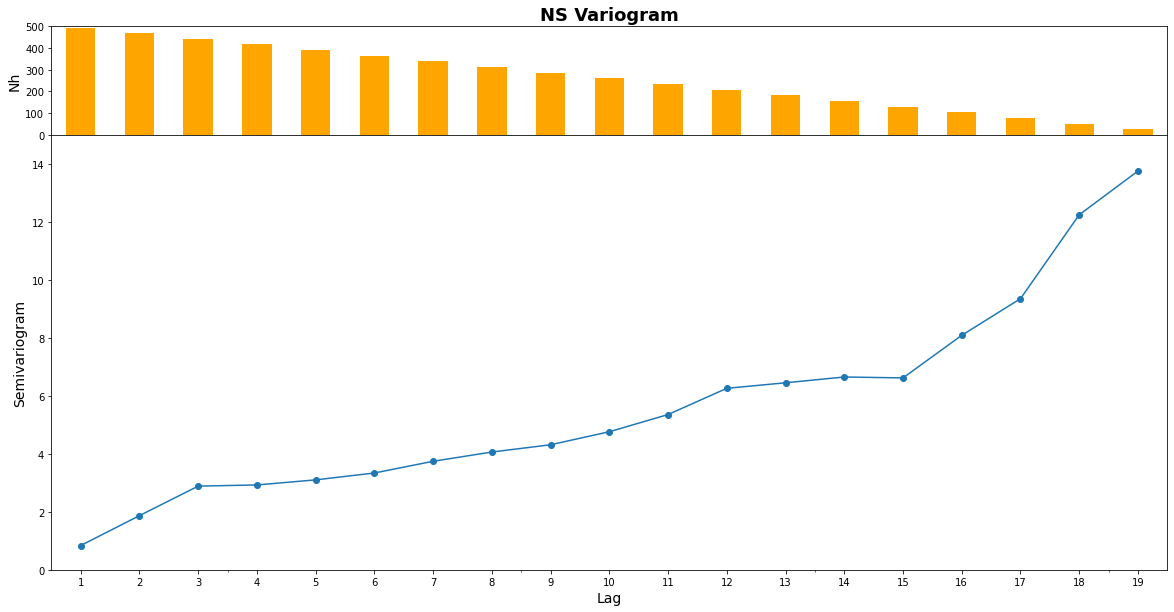

In [63]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [1, 4]})
ns_v.plot(x=None, y=['Variogram'], ax=axes[1], kind='line', marker='o', legend=False)
ns_v.plot(x='Lags', y=['Nh'],ax=axes[0], kind='bar', color="orange", legend=False)
axes[1].set_xlabel("Lag", fontsize=14)
axes[1].set_ylabel("Semivariogram", fontsize=14)
axes[0].set_ylabel("Nh", fontsize=14)
axes[0].set_title("NS Variogram", fontsize=18, fontweight='bold')
axes[1].set_ylim(0, 15)
axes[0].set_ylim(0, 500)
#ax.xaxis.get_major_locator().set_params(integer=True)
plt.subplots_adjust(hspace=0.)

---
<span style='color:Blue'>
    
### Problem 6: Omni-Directional semi-variogram (“2d_directional_semivariograms_DATA.xlsx”)
    
</span>

---

---
<span style='color:Blue'>
    
a) Using the well coordinates and their porosities in the “well_data” worksheet, calculate the omni-directional semi-variogram for lags of 1 to 12 in steps of 1. Make the tolerance an input variable and start with a value of 0.5. Also compute the variance of the data.
(Hint: First develop a matrix of distances between well pairs)
    
</span>

---

---
<span style='color:Blue'>
    
Solution Steps	
a)	first find the distance (separation) between all possible well pairs
    
b)	next compute the squared difference in porosity for all possible well pairs
    
c)	to calculate the semivariogram for lag h, you need to find all pairs (count the number) that are separated by a distance h +/- delta h
    
d)	then you need to sum the (squred porosity differences) for that same set of pairs
    
e)	divide the sum by the number of pairs (at each lag)
    
</span>

---

---
<span style='color:Blue'>
    
Read the second sheet of the data file and clean the data set.
    
</span>

---

In [64]:
file_name5 = '../data/2d_directional_semivariograms_v2_DATA.xlsx'
df = pd.read_excel(file_name5) 
df.head(10)

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,16.835904,18.658786,18.832150,19.818449,19.439522,19.549894,20.678720,18.188821,17.337882,...,23.958840,22.069691,23.033891,22.590174,20.813563,19.701985,16.599940,14.871449,14.347081,12.760648
1,2,18.263543,19.584044,18.974337,19.496578,19.029379,19.667150,20.708275,18.539164,17.667542,...,22.933053,22.389079,23.720206,22.860063,22.209521,21.514342,19.238038,17.958892,17.018816,16.325445
2,3,17.799354,17.616518,16.179233,16.472274,15.934735,17.348716,18.053327,17.765830,18.065806,...,21.224637,21.706283,22.657944,21.855913,20.959269,19.839584,19.084629,18.782790,18.098015,18.462910
3,4,17.307676,18.361606,17.280016,16.674519,17.511488,18.587844,19.447731,19.236063,18.498889,...,20.385061,20.923212,21.349303,20.486808,20.363351,19.984354,21.013513,20.844552,20.470994,22.208702
4,5,14.308531,16.576740,16.863928,16.579373,17.904940,18.375735,19.678250,20.311777,18.853231,...,18.234707,18.828703,18.525864,18.638359,18.240124,17.698124,18.794936,18.407496,17.972868,19.963405
5,6,15.570176,18.558815,19.187689,18.840690,20.199000,19.712195,21.526590,21.439000,18.900726,...,16.408368,17.118842,18.077513,18.802970,19.029151,19.767131,21.026859,20.679517,19.481604,20.655053
6,7,16.624379,18.414837,19.471947,19.227251,19.760513,18.679761,20.539897,21.073652,20.017852,...,15.748098,16.856608,18.056346,18.428818,18.228650,18.865268,18.769009,18.959107,18.183263,18.291886
7,8,17.981645,18.309335,18.929583,19.061756,20.142944,19.665766,20.376844,20.449062,20.090784,...,17.787542,18.201587,19.611748,19.771962,19.131340,19.391992,19.733737,19.878233,19.246641,19.053583
8,9,18.099672,17.942696,18.930134,18.952417,19.517073,19.816677,19.333174,19.563980,20.038093,...,19.916352,19.362973,19.998295,19.368048,19.387659,18.840841,18.845216,18.730383,19.397400,19.366344
9,10,18.029734,17.924214,19.306427,18.874746,19.855217,21.105775,19.750404,20.208825,19.927170,...,19.692224,19.571499,19.000864,18.490820,18.930819,17.873616,18.602194,18.633869,18.448069,18.848047


In [65]:
# Drop 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'], errors='ignore')
df

,1,2,3,4,5,6,7,8,9,10,...,16,17,18,19,20,21,22,23,24,25
0,16.835904,18.658786,18.832150,19.818449,19.439522,19.549894,20.678720,18.188821,17.337882,18.911934,...,23.958840,22.069691,23.033891,22.590174,20.813563,19.701985,16.599940,14.871449,14.347081,12.760648
1,18.263543,19.584044,18.974337,19.496578,19.029379,19.667150,20.708275,18.539164,17.667542,19.173442,...,22.933053,22.389079,23.720206,22.860063,22.209521,21.514342,19.238038,17.958892,17.018816,16.325445
2,17.799354,17.616518,16.179233,16.472274,15.934735,17.348716,18.053327,17.765830,18.065806,19.471854,...,21.224637,21.706283,22.657944,21.855913,20.959269,19.839584,19.084629,18.782790,18.098015,18.462910
3,17.307676,18.361606,17.280016,16.674519,17.511488,18.587844,19.447731,19.236063,18.498889,19.509349,...,20.385061,20.923212,21.349303,20.486808,20.363351,19.984354,21.013513,20.844552,20.470994,22.208702
4,14.308531,16.576740,16.863928,16.579373,17.904940,18.375735,19.678250,20.311777,18.853231,18.585059,...,18.234707,18.828703,18.525864,18.638359,18.240124,17.698124,18.794936,18.407496,17.972868,19.963405
5,15.570176,18.558815,19.187689,18.840690,20.199000,19.712195,21.526590,21.439000,18.900726,18.809825,...,16.408368,17.118842,18.077513,18.802970,19.029151,19.767131,21.026859,20.679517,19.481604,20.655053
6,16.624379,18.414837,19.471947,19.227251,19.760513,18.679761,20.539897,21.073652,20.017852,18.635176,...,15.748098,16.856608,18.056346,18.428818,18.228650,18.865268,18.769009,18.959107,18.183263,18.291886
7,17.981645,18.309335,18.929583,19.061756,20.142944,19.665766,20.376844,20.449062,20.090784,19.820362,...,17.787542,18.201587,19.611748,19.771962,19.131340,19.391992,19.733737,19.878233,19.246641,19.053583
8,18.099672,17.942696,18.930134,18.952417,19.517073,19.816677,19.333174,19.563980,20.038093,19.381182,...,19.916352,19.362973,19.998295,19.368048,19.387659,18.840841,18.845216,18.730383,19.397400,19.366344
9,18.029734,17.924214,19.306427,18.874746,19.855217,21.105775,19.750404,20.208825,19.927170,19.097235,...,19.692224,19.571499,19.000864,18.490820,18.930819,17.873616,18.602194,18.633869,18.448069,18.848047


---
<span style='color:Blue'>
    
The first step is to  find the distance (separation) between all possible well pairs. The image below shows the results of this step in Excel. This is meant to illustrate visually what we need to do.
    
In general, Excel is a very poor tool for doing these types of calculations with realistically sized data sets.
    
</span>

--- 

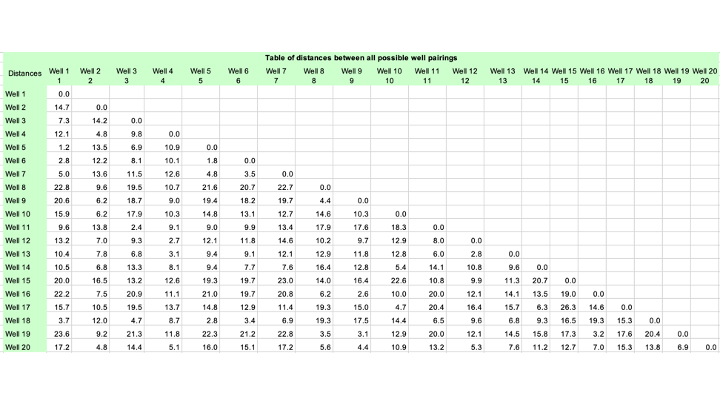

---
<span style='color:Blue'>
    
Use *numpy.asmatrix* to convert the data to interpret the input as a matrix.
    
</span>

--- 

In [66]:
print(df.columns)

Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25],
      dtype='object')


### Tranform the data

Working with spatial data in Python, it is often easier to work with a two-column array where `X` represents the East-West location and `Y` represents the North-South location.

To transform the data from your Excel file into a pandas DataFrame with two columns, "X" and "Y", we'll first read the Excel file. Then, we'll create a script that reshapes the data into the desired format. Here's a step-by-step guide on how to do it:

Create a new DataFrame where each row contains two columns: "X" for the East-West direction and "Y" for the North-South direction.
To achieve this, we'll iterate over the original DataFrame, converting the row and column indices into "X" and "Y" coordinates.

In [81]:
# Set the desired number of rows and columns based on the data's dimensions
# Assuming the first row/column are labels, adjust indices to include all data
num_rows = df.shape[0] + 1  # Include all rows
num_cols = df.shape[1]  # Include all columns

# Lists to hold the X, Y coordinates and porosity values
x_values = []
y_values = []
poro_values = []

# Loop through each cell in the specified range to extract X, Y coordinates and porosity values
for x in range(1, num_rows):  # Rows
    for y in range(1, num_cols):  # Columns
        x_values.append(x)
        y_values.append(y)
        poro_values.append(df.iloc[x - 1, y])  # Accessing cell value, adjusting for zero indexing

# Create a DataFrame from the collected data
transformed_df = pd.DataFrame({
    'X': x_values,
    'Y': y_values,
    'Poro': poro_values
})

transformed_df.head()

print(transformed_df.head())
print(transformed_df.tail())

   X  Y       Poro
0  1  1  18.658786
1  1  2  18.832150
2  1  3  19.818449
3  1  4  19.439522
4  1  5  19.549894
      X   Y       Poro
475  20  20  16.184545
476  20  21  16.773702
477  20  22  17.486341
478  20  23  18.600279
479  20  24  19.765586


In [84]:
x = transformed_df['X']
y = transformed_df['Y']
poro = transformed_df['Poro']
x = np.asmatrix(x).T
y = np.asmatrix(y).T
poro = np.asmatrix(poro).T
x.shape

(480, 1)

---
<span style='color:Blue'>
    
Set up a grid with cell that are 1*1 in size..
    
</span>

--- 

In [85]:
n_wells = len(x)
ones = np.asmatrix(np.ones(n_wells))
ones.shape
ones

matrix([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

---
<span style='color:Blue'>
    
Calculate the distances using the Pythagorean theorem.
    
</span>

--- 

In [86]:
X = x*ones
Y = y*ones
dist = np.power( (np.power((X-X.T),2)+np.power((Y-Y.T),2)),0.5)
dist.shape

(480, 480)

---
<span style='color:Blue'>
    
The second step is to compute the squared difference in porosity for all possible well pairs.
    
The results should look like this Excel image:

</span>

--- 

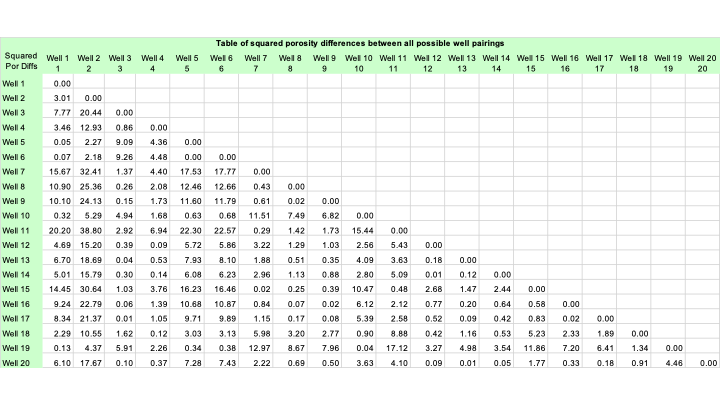

In [87]:
PORO = poro*ones
Square_diff = np.power((PORO-PORO.T),2)

---
<span style='color:Blue'>
    
The remaining steps are:
    
c)	to calculate the semivariogram for lag h, you need to find all pairs (count the number) that are separated by a distance h +/- delta h
    
d)	then you need to sum the (squred porosity differences) for that same set of pairs
    
e)	divide the sum by the number of pairs (at each lag)

</span>

--- 

In [88]:
n_lags = 12
tol = 0.5
omni_variogram = np.zeros(n_lags+1)
omni_vario=[]
for lags in range(1,n_lags+1):
    ul = lags+tol
    ll = lags-tol
    index = np.argwhere((dist<=ul) & (dist>=ll)) # Find the indices of array elements that are non-zero, grouped by element.
    nh = index.shape[0]
    omni_variogram[lags] = np.sum(Square_diff[index[:,0],index[:,1]])/(2*nh)
    omni_vario.append((lags, nh, omni_variogram[lags]))
omni_variogram = np.delete(ns_variogram, 0)
    
omni_v = DataFrame(omni_vario)
omni_v.columns = ['Lags', 'Nh', 'Variogram']

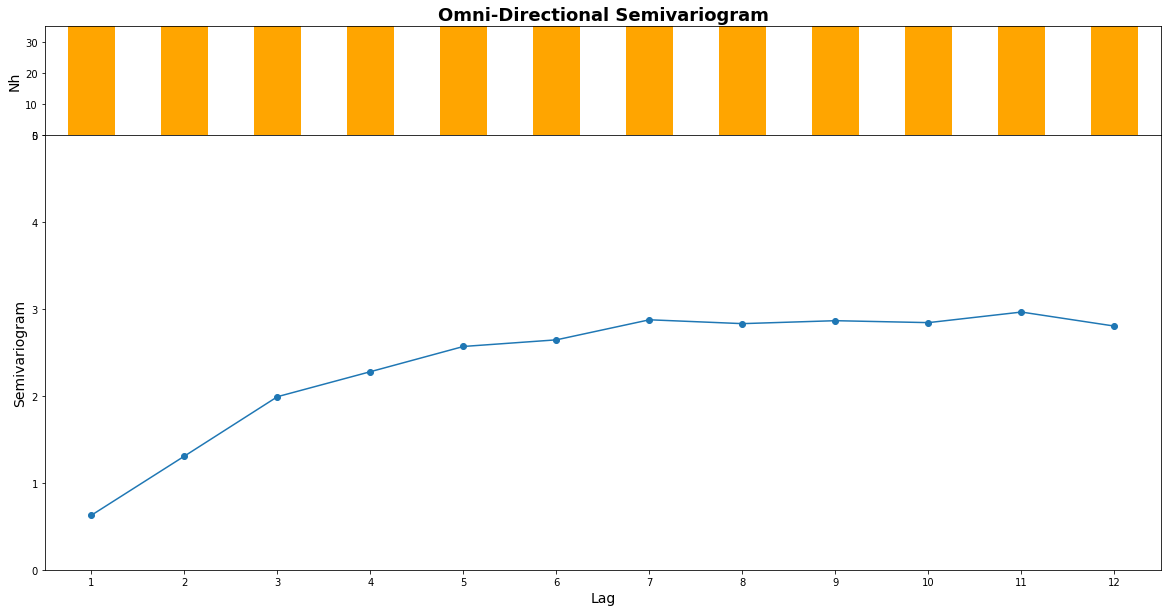

In [98]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 10), sharex=True, gridspec_kw={'height_ratios': [1, 4]})
omni_v.plot(x=None, y=['Variogram'], ax=axes[1], kind='line', marker='o', legend=False)
omni_v.plot(x='Lags', y=['Nh'],ax=axes[0], kind='bar', color="orange", legend=False)
axes[1].set_xlabel("Lag", fontsize=14)
axes[1].set_ylabel("Semivariogram", fontsize=14)
axes[0].set_ylabel("Nh", fontsize=14)
axes[0].set_title("Omni-Directional Semivariogram", fontsize=18, fontweight='bold')
axes[1].set_ylim(0, 5)
axes[0].set_ylim(0, 35)
#ax.xaxis.get_major_locator().set_params(integer=True)
plt.savefig('../figs/sv_0.1.png')
plt.subplots_adjust(hspace=0.)

---
<span style='color:Blue'>
    
b)	How does the range compare with the ranges of the EW and NS directional semivariograms?
    
The ranges for the directional variograms were about 3 and 7. The omni-directional looks to have a range of about 5 (considering both the variogram and the sill ~ 3) which is the average of the diirectional variograms.
    
This makes sense.

</span>

--- 

---
<span style='color:Blue'>
    
c)	Vary the tolerance (say 0.1, 0.25, 0.75, 1, 2, 5, 10, 25) and observe the semi-variogram and number of pairs.

</span>

--- 

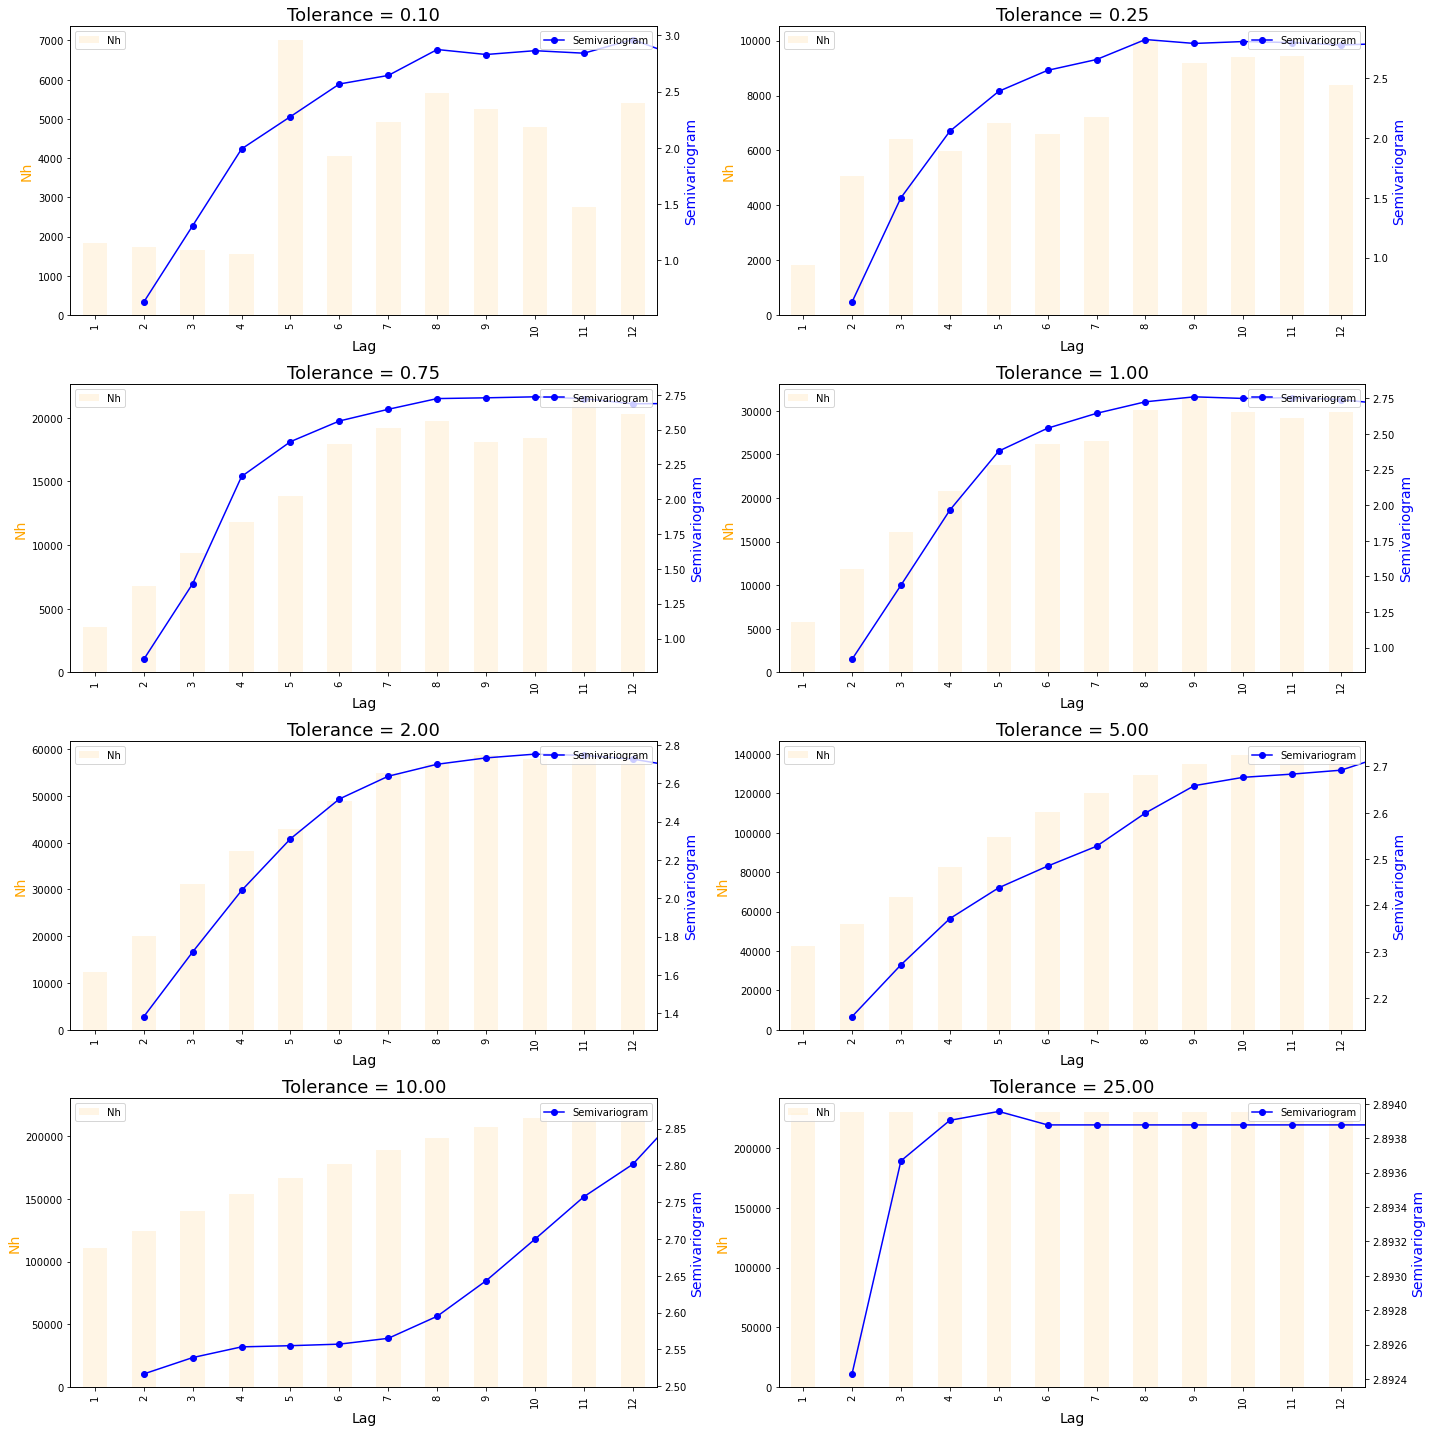

In [112]:

tols = [0.1, 0.25, 0.75, 1, 2, 5, 10, 25]  # Updated list of tolerance values with 0.1 included
n_lags = 12

# Create a 4x2 subplot layout to accommodate all 8 plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten to easily iterate over it

for i, tol in enumerate(tols):
    omni_variogram = np.zeros(n_lags+1)
    omni_vario = []
    for lags in range(1, n_lags+1):
        ul = lags + tol
        ll = lags - tol
        index = np.argwhere((dist <= ul) & (dist >= ll))  # Find indices within the tolerance
        nh = index.shape[0]
        if nh > 0:  # Check to avoid division by zero
            omni_variogram[lags] = np.sum(Square_diff[index[:,0], index[:,1]]) / (2 * nh)
        else:
            omni_variogram[lags] = 0
        omni_vario.append((lags, nh, omni_variogram[lags]))

    omni_variogram = np.delete(omni_variogram, 0)
    omni_v = pd.DataFrame(omni_vario, columns=['Lags', 'Nh', 'Variogram'])

    # Plot both Nh and Variogram for the current tolerance on the same subplot
    ax = axes[i]
    omni_v.plot(x='Lags', y=['Nh'], ax=ax, kind='bar', color="orange", alpha=0.1)
    ax2 = ax.twinx()  # Create a second y-axis for the variogram
    omni_v.plot(x='Lags', y=['Variogram'], ax=ax2, kind='line', marker='o', color="blue")
    
    ax.set_xlabel("Lag", fontsize=14)
    ax.set_ylabel("Nh", fontsize=14, color="orange")
    ax2.set_ylabel("Semivariogram", fontsize=14, color="blue")
    ax.set_title(f"Tolerance = {tol:.2f}", fontsize=18)

    # Manually add legends after plotting
    ax.legend(['Nh'], loc='upper left')
    ax2.legend(['Semivariogram'], loc='upper right')

plt.tight_layout()
plt.show()


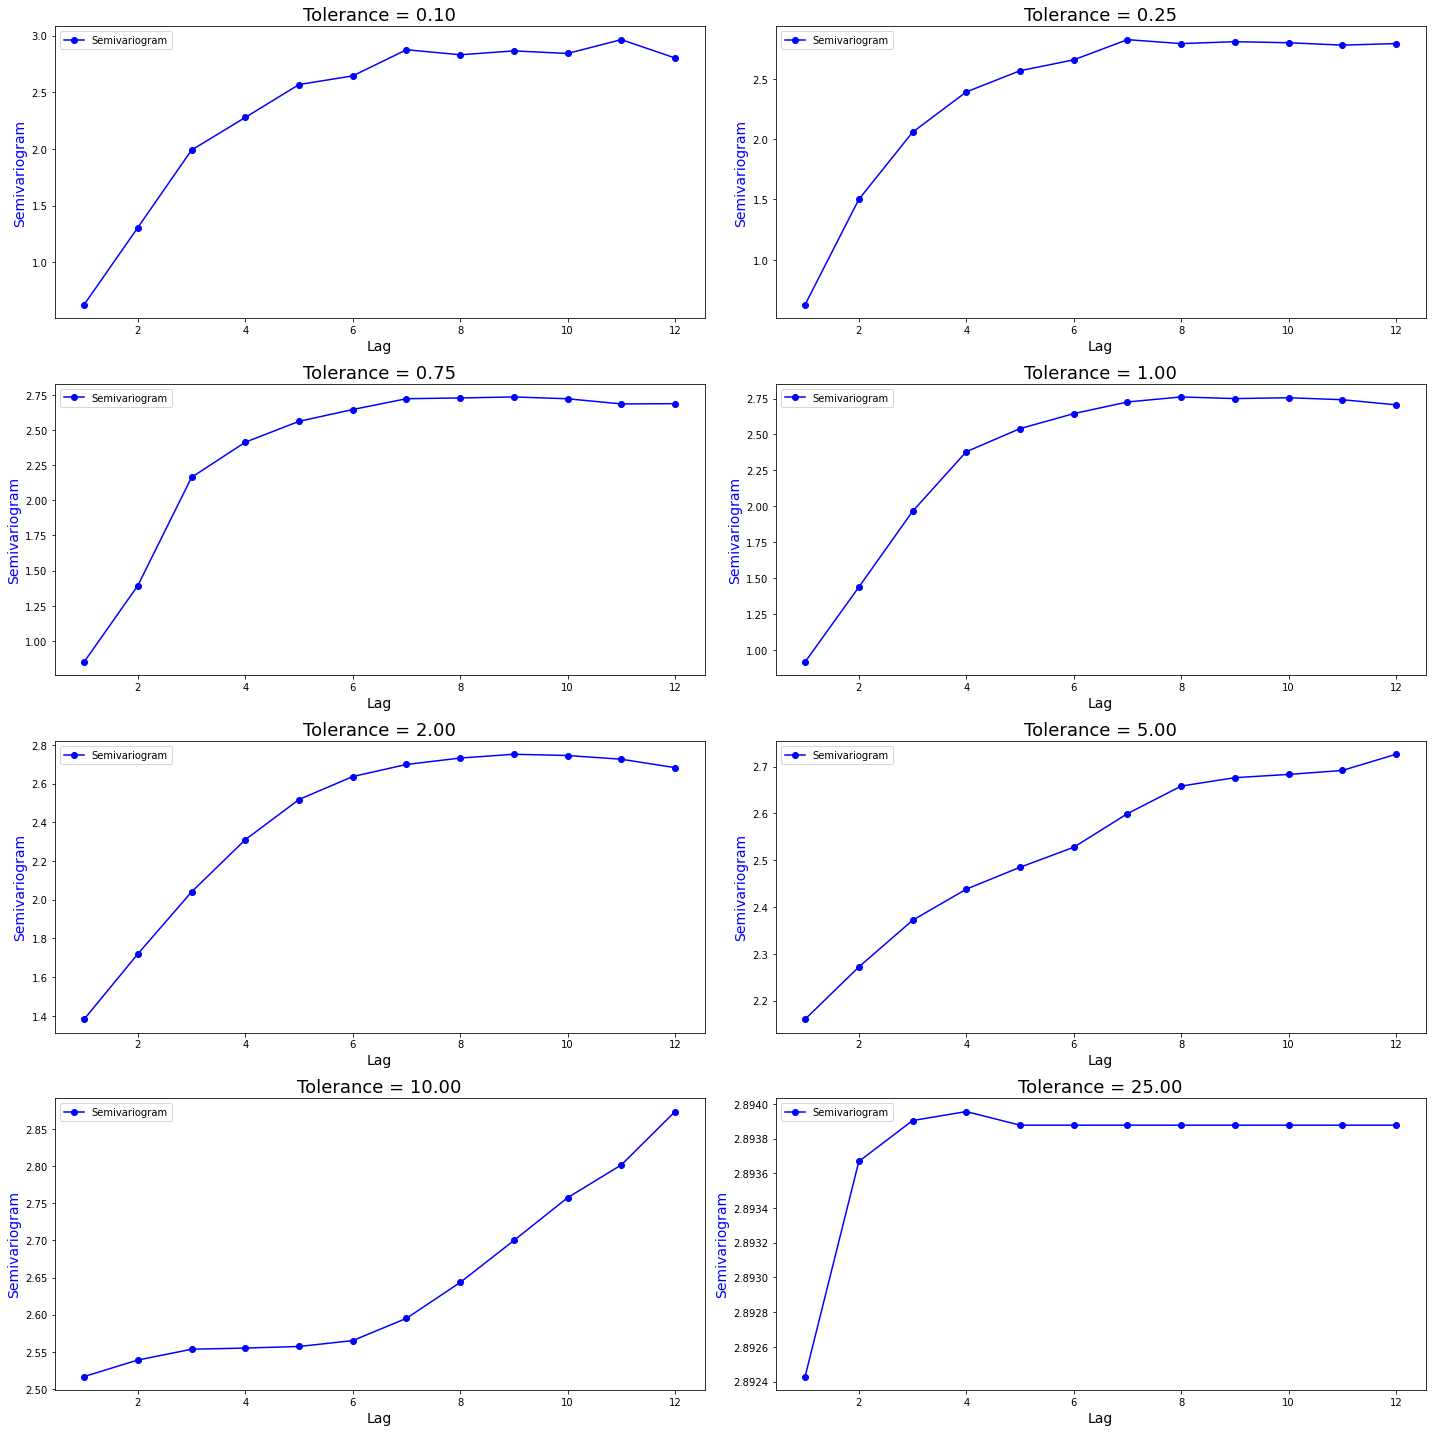

In [111]:

tols = [0.1, 0.25, 0.75, 1, 2, 5, 10, 25]  # List of tolerance values
n_lags = 12

# Create a 4x2 subplot layout to accommodate all 8 plots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
axes = axes.flatten()  # Flatten to easily iterate over it

for i, tol in enumerate(tols):
    omni_vario = []
    for lags in range(1, n_lags + 1):
        ul = lags + tol
        ll = lags - tol
        index = np.argwhere((dist <= ul) & (dist >= ll))
        nh = len(index)
        if nh > 0:
            variogram_value = np.sum(Square_diff[index[:, 0], index[:, 1]]) / (2 * nh)
        else:
            variogram_value = np.nan
        omni_vario.append((lags, nh, variogram_value))

    omni_v = pd.DataFrame(omni_vario, columns=['Lags', 'Nh', 'Variogram'])

    # Plot only the Semivariogram for the current tolerance
    ax = axes[i]
    # Convert to NumPy arrays before plotting
    ax.plot(omni_v['Lags'].values, omni_v['Variogram'].values, marker='o', color="blue", label='Semivariogram')
    ax.set_ylabel("Semivariogram", fontsize=14, color="blue")
    ax.set_xlabel("Lag", fontsize=14)
    ax.set_title(f"Tolerance = {tol:.2f}", fontsize=18)
    ax.legend(loc='upper left')

plt.tight_layout()
plt.show()


# The End